In [352]:
## leemos el archicvo xlsx 
df = pd.read_excel('Participante_1/participante_1_Mix.xlsx')

In [353]:
#mostramos la cabecera
print(df.head())


   Recording timestamp  Computer timestamp       Sensor         Project name  \
0                    0        712783472114          NaN  ESTIMULOS POSITIVOS   
1                73463        712783545577  Eye Tracker  ESTIMULOS POSITIVOS   
2                90113        712783562227  Eye Tracker  ESTIMULOS POSITIVOS   
3               121824        712783593938  Eye Tracker  ESTIMULOS POSITIVOS   
4               138478        712783610592  Eye Tracker  ESTIMULOS POSITIVOS   

  Export date Participant name Recording name Recording date  \
0  14/12/2023   Participante 1     Recording1     12/12/2023   
1  14/12/2023   Participante 1     Recording1     12/12/2023   
2  14/12/2023   Participante 1     Recording1     12/12/2023   
3  14/12/2023   Participante 1     Recording1     12/12/2023   
4  14/12/2023   Participante 1     Recording1     12/12/2023   

  Recording date UTC Recording start time  ...  \
0         12/12/2023         10:06:18.405  ...   
1         12/12/2023         10:06

## Trartamiento delos datos
### Validar cuales son las columnas con datos faltantes


In [354]:
# Contar los valores nulos en cada columna
valores_faltantes_por_columna = df.isnull().sum()

# Filtrar las columnas que tienen valores faltantes
columnas_con_valores_faltantes = valores_faltantes_por_columna[valores_faltantes_por_columna > 0]

# Mostrar las columnas con valores faltantes y la cantidad de valores faltantes en cada una
print("Columnas con valores faltantes:")
print(columnas_con_valores_faltantes)

Columnas con valores faltantes:
Sensor                                            56
Average calibration precision RMS (degrees)    13502
Eyetracker timestamp                             142
Gaze point X                                     823
Gaze point Y                                     823
Gaze point left X                               1669
Gaze point left Y                               1669
Gaze point right X                              1174
Gaze point right Y                              1174
Gaze direction left X                           1669
Gaze direction left Y                           1669
Gaze direction left Z                           1669
Gaze direction right X                          1174
Gaze direction right Y                          1174
Gaze direction right Z                          1174
Pupil diameter left                             1669
Pupil diameter right                            1174
Pupil diameter filtered                          723
Validity right

### Eliminamos las columnas vacias

In [355]:
## obtenemos las columnas vacias
columnasVacias = df.columns[df.isna().all()].tolist()
print(columnasVacias)



['Average calibration precision RMS (degrees)', 'Ungrouped', 'Client area position X (DACSpx)', 'Client area position Y (DACSpx)', 'Viewport position X', 'Viewport position Y', 'Viewport width', 'Viewport height', 'Full page width', 'Full page height']


In [356]:
#eliminamos esas columnas
df.drop(columns=empty_columns, inplace=True)

In [357]:
# Mostramos la cantidad de colummnas restantes
print(df.shape)


(13502, 74)


### Procedemos a completar datos faltantes en las columnas 

#### Primero determinamos cuales son numericas


In [358]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = df.dtypes

# Filtrar las columnas que son numéricas
columnas_numericas = tipos_de_datos[tipos_de_datos != 'object'].index.tolist()

# Mostrar las columnas numéricas
print("Columnas numéricas:")
print(columnas_numericas)

Columnas numéricas:
['Recording timestamp', 'Computer timestamp', 'Recording duration', 'Recording resolution height', 'Recording resolution width', 'Recording monitor latency', 'Average calibration accuracy (mm)', 'Average calibration accuracy (degrees)', 'Average calibration accuracy (pixels)', 'Average validation accuracy (mm)', 'Average validation precision SD (mm)', 'Average validation precision RMS (mm)', 'Average validation accuracy (degrees)', 'Average validation precision SD (degrees)', 'Average validation precision RMS (degrees)', 'Average validation accuracy (pixels)', 'Average validation precision SD (pixels)', 'Average validation precision RMS (pixels)', 'Eyetracker timestamp', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z', 'Pupil diameter left', 'Pupil

#### Obteniendo los columnas numericas porcedemos a completar los datos con la tecnica inputacion en base a la media de la columnas

In [359]:


# Crear un imputador con la estrategia mean
imputer = SimpleImputer(strategy='mean') 


# Recorrer las columnas numéricas y aplicar la imputación
for columna in columnas_numericas:
    # Seleccionar la columna específica
    columna_especifica = df[columna]
    
    # Aplicar la imputación en la columna específica
    columna_imputada = imputer.fit_transform(columna_especifica.values.reshape(-1, 1))
    
    # Reemplazar la columna original con la columna imputada
    df[columna] = columna_imputada

#### Verificamos cuales son las columnas que quedan con datos faltatntes las cuales son alfanumericas

In [360]:
# Contar los valores nulos en cada columna
valores_faltantes_por_columna = df.isnull().sum()

# Filtrar las columnas que tienen valores faltantes
columnas_con_valores_faltantes = valores_faltantes_por_columna[valores_faltantes_por_columna > 0]

# Mostrar las columnas con valores faltantes y la cantidad de valores faltantes en cada una
print("Columnas con valores faltantes:")
print(columnas_con_valores_faltantes)

Columnas con valores faltantes:
Sensor                        56
Validity right               142
Presented Stimulus name     5805
Presented Media name       10488
Eye movement type           5722
dtype: int64


#### Procedemos a completar las colunnas faltantes de las columnas con inpuntacion del mas frecuente

In [361]:
from sklearn.impute import SimpleImputer

# Identificar las columnas con valores faltantes
columns_with_missing_values = df.columns[df.isna().any()].tolist()

# Crear un imputador con la estrategia 'most_frequent' para columnas alfanuméricas
imputer = SimpleImputer(strategy='most_frequent')

# Aplicar la imputación solo a las columnas con valores faltantes
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])


#### Verificiamos que no exitan columnas con valores Nulos

In [362]:
# Contar los valores nulos en cada columna
valores_faltantes_por_columna = df.isnull().sum()

# Filtrar las columnas que tienen valores faltantes
columnas_con_valores_faltantes = valores_faltantes_por_columna[valores_faltantes_por_columna > 0]

# Mostrar las columnas con valores faltantes y la cantidad de valores faltantes en cada una
print("Columnas con valores faltantes:")
print(columnas_con_valores_faltantes)

Columnas con valores faltantes:
Series([], dtype: int64)


### Guardamos los datos tratados

In [363]:
# Guardar el DataFrame en un archivo Excel
df.to_excel("Participante_1/datos_imputados.xlsx", index=False)


## Normalizacion de datos

In [364]:
# Seleccionar columnas que son alfanuméricas
columnas_alfanumericas = df.select_dtypes(include=['object']).columns
print(columnas_alfanumericas)

Index(['Sensor', 'Project name', 'Export date', 'Participant name',
       'Recording name', 'Recording date', 'Recording date UTC',
       'Recording start time', 'Recording start time UTC', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Validity right', 'Presented Stimulus name', 'Presented Media name',
       'Eye movement type'],
      dtype='object')


### Fractorizamos los columnas

In [365]:
# Convertir valores alfanuméricos a valores numéricos únicos
for columna in df.select_dtypes(include=['object']).columns:
    df[columna] = pd.factorize(df[columna])[0]
print(df)

       Recording timestamp  Computer timestamp  Sensor  Project name  \
0                      0.0        7.127835e+11       0             0   
1                  73463.0        7.127835e+11       0             0   
2                  90113.0        7.127836e+11       0             0   
3                 121824.0        7.127836e+11       0             0   
4                 138478.0        7.127836e+11       0             0   
...                    ...                 ...     ...           ...   
13497          129013777.0        7.127642e+11       0             1   
13498          129030432.0        7.127642e+11       0             1   
13499          129047085.0        7.127642e+11       0             1   
13500          129061138.0        7.127642e+11       0             1   
13501          129231669.0        7.127644e+11       0             1   

       Export date  Participant name  Recording name  Recording date  \
0                0                 0               0           

### Normalizamos los datos con la tecnica min max scaler

In [366]:
from sklearn.preprocessing import MinMaxScaler

# Copiar el DataFrame original para evitar cambios no deseados
df_copy = df.copy()

# Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas numéricas y aplicar la normalización min-max
df_copy[df_copy.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df_copy.select_dtypes(include=['int64', 'float64']))

# Mostrar el DataFrame normalizado
print(df_copy)


       Recording timestamp  Computer timestamp  Sensor  Project name  \
0                 0.000000            0.606056     0.0           0.0   
1                 0.000568            0.606356     0.0           0.0   
2                 0.000697            0.606424     0.0           0.0   
3                 0.000943            0.606554     0.0           0.0   
4                 0.001072            0.606622     0.0           0.0   
...                    ...                 ...     ...           ...   
13497             0.998314            0.527141     0.0           1.0   
13498             0.998443            0.527209     0.0           1.0   
13499             0.998572            0.527277     0.0           1.0   
13500             0.998680            0.527334     0.0           1.0   
13501             1.000000            0.528031     0.0           1.0   

       Export date  Participant name  Recording name  Recording date  \
0              0.0               0.0             0.0           

### Guardamos los datos normalizados

In [367]:
# Guardar el DataFrame normalizdo en un archivo Excel
df_copy.to_excel("Participante_1/datos_normalizados.xlsx", index=False)
df_copy.rename(columns={'Project name': 'Emotions'}, inplace=True)

In [368]:
# Obtener las primeras filas del DataFrame
print(df.head())

# Verificar el tamaño del DataFrame
print(df.shape)

# Obtener información sobre las columnas y tipos de datos
print(df.info())

# Resumen estadístico de las variables numéricas
print(df.describe())


   Recording timestamp  Computer timestamp  Sensor  Project name  Export date  \
0                  0.0        7.127835e+11       0             0            0   
1              73463.0        7.127835e+11       0             0            0   
2              90113.0        7.127836e+11       0             0            0   
3             121824.0        7.127836e+11       0             0            0   
4             138478.0        7.127836e+11       0             0            0   

   Participant name  Recording name  Recording date  Recording date UTC  \
0                 0               0               0                   0   
1                 0               0               0                   0   
2                 0               0               0                   0   
3                 0               0               0                   0   
4                 0               0               0                   0   

   Recording start time  ...  Original Media height  Eye movem

## Mineria de los datos
### vamos determinar las categrias mediante la tecnica de correlacion

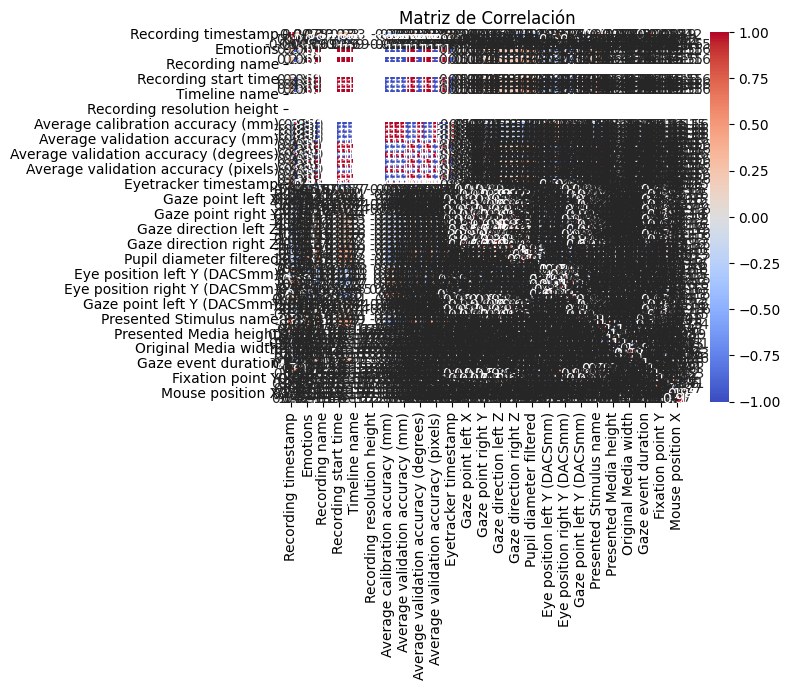

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


### Martriz de correlacion con varias columnas

In [370]:
## haremos una correlacion en base a la columna de sentimientos
# Calcular la correlación entre todas las columnas y la columna de diámetro pupilar filtrado
correlation_results_Emociones = df_copy.corr()['Emotions']

# Mostrar la correlación para cada columna
print(correlation_results_Emociones)


Recording timestamp           2.298347e-01
Computer timestamp           -8.891331e-01
Sensor                        6.863162e-02
Emotions                      1.000000e+00
Export date                            NaN
                                  ...     
Fixation point Y             -8.002007e-15
Fixation point X (MCSnorm)   -2.073957e-15
Fixation point Y (MCSnorm)    1.284960e-15
Mouse position X              1.261684e-15
Mouse position Y             -1.361540e-16
Name: Emotions, Length: 74, dtype: float64


In [371]:
## haremos una correlacion en base a la columna de Pupil diameter right
# Calcular la correlación entre todas las columnas y la columna de diámetro pupilar filtrado
correlation_results_Pupil_diameter_right = df_copy.corr()['Pupil diameter right']

# Mostrar la correlación para cada columna
print(correlation_results_Pupil_diameter_right)

Recording timestamp          -1.433569e-01
Computer timestamp           -4.356780e-01
Sensor                       -9.675430e-16
Emotions                      3.692967e-01
Export date                            NaN
                                  ...     
Fixation point Y              1.418006e-01
Fixation point X (MCSnorm)   -2.558261e-02
Fixation point Y (MCSnorm)   -5.533549e-02
Mouse position X             -1.028315e-15
Mouse position Y             -1.376999e-15
Name: Pupil diameter right, Length: 74, dtype: float64


In [372]:
## haremos una correlacion en base a la columna de Pupil diameter left
# Calcular la correlación entre todas las columnas y la columna de diámetro pupilar filtrado
correlation_results_Pupil_diameter_left = df_copy.corr()['Pupil diameter left']

# Mostrar la correlación para cada columna
print(correlation_results_Pupil_diameter_left)

Recording timestamp          -1.943688e-01
Computer timestamp           -4.821455e-01
Sensor                        1.007982e-15
Emotions                      3.918394e-01
Export date                            NaN
                                  ...     
Fixation point Y              1.165311e-01
Fixation point X (MCSnorm)   -4.378368e-02
Fixation point Y (MCSnorm)   -6.373376e-02
Mouse position X              3.805569e-16
Mouse position Y              3.763078e-16
Name: Pupil diameter left, Length: 74, dtype: float64


In [373]:
## haremos una correlacion en base a la columna de Pupil diameter filtered
# Calcular la correlación entre todas las columnas y la columna de diámetro pupilar filtrado
correlation_results_Pupil_diameter_filtered = df_copy.corr()['Pupil diameter filtered']

# Mostrar la correlación para cada columna
print(correlation_results_Pupil_diameter_filtered)

Recording timestamp          -2.019084e-01
Computer timestamp           -4.744900e-01
Sensor                        1.286181e-15
Emotions                      3.806071e-01
Export date                            NaN
                                  ...     
Fixation point Y              1.433023e-01
Fixation point X (MCSnorm)   -3.195988e-02
Fixation point Y (MCSnorm)   -5.408805e-02
Mouse position X              1.805076e-16
Mouse position Y              2.932483e-17
Name: Pupil diameter filtered, Length: 74, dtype: float64


### Filtramos las columnas con correlacion siginificativa

In [374]:
threshold = 0.8 # umbral de corelacion

# Convertir la Serie correlation_results en un DataFrame
correlation_results_df = correlation_results_Emociones.to_frame()

# Filtrar las columnas con correlaciones significativas
relevant_columns1 = correlation_results_df[(correlation_results_df > threshold) | (correlation_results_df < -threshold)].dropna(axis=0, how='all').index

# Imprimir las columnas relevantes
print(relevant_columns1)

Index(['Computer timestamp', 'Emotions', 'Participant name',
       'Recording start time', 'Recording start time UTC',
       'Recording duration', 'Average calibration accuracy (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration accuracy (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'Average validation precision RMS (mm)',
       'Average validation accuracy (degrees)',
       'Average validation precision SD (degrees)',
       'Average validation precision RMS (degrees)',
       'Average validation accuracy (pixels)',
       'Average validation precision SD (pixels)',
       'Average validation precision RMS (pixels)', 'Eyetracker timestamp'],
      dtype='object')


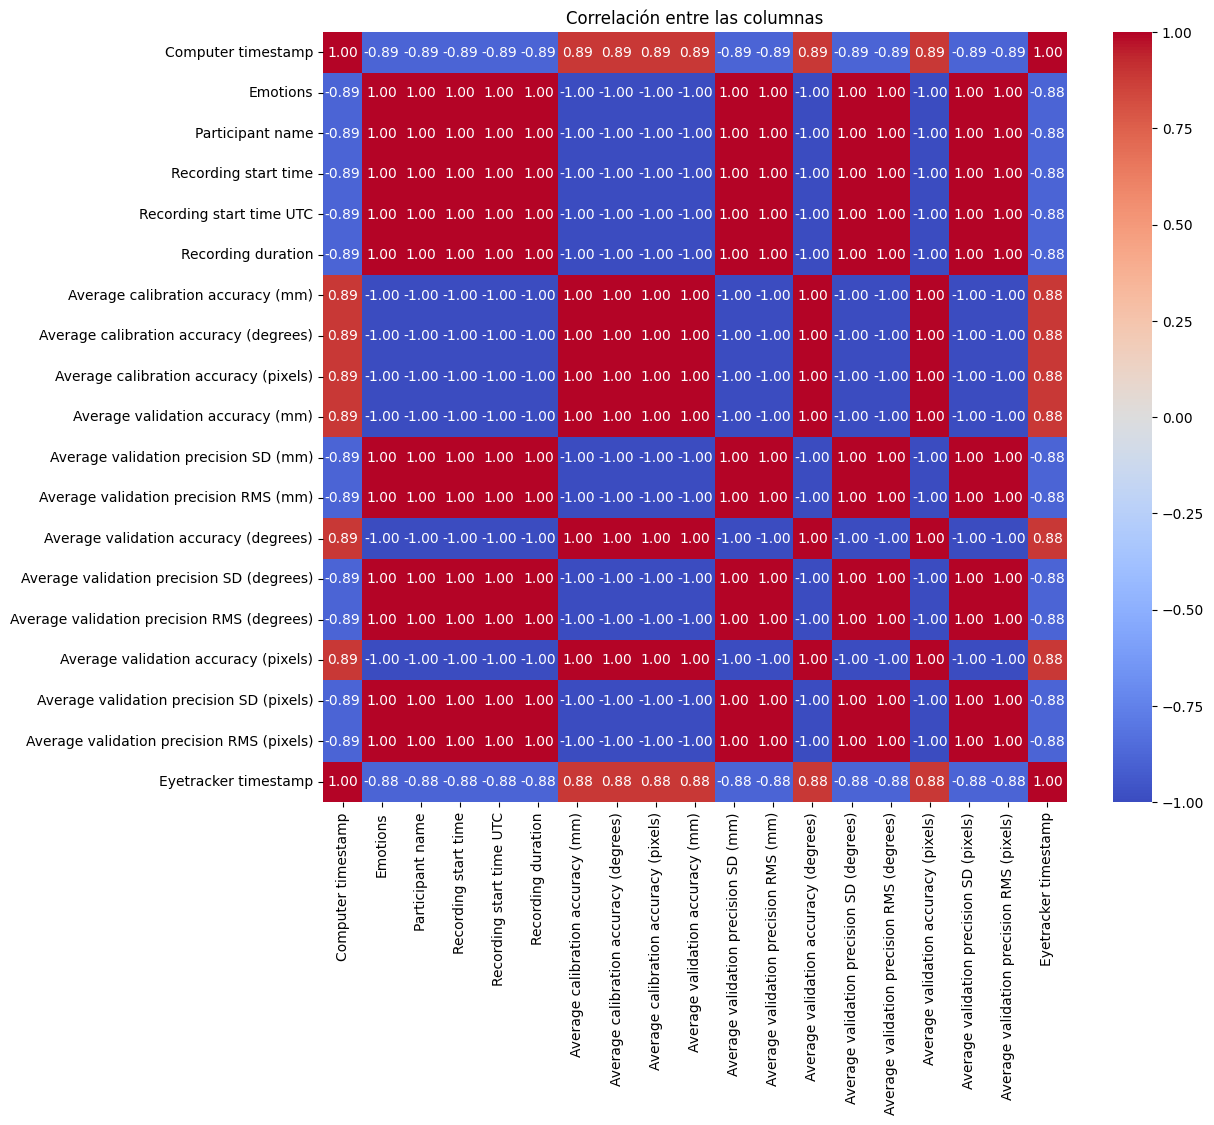

In [375]:
df_significativas = df_copy[relevant_columns1]
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df_significativas.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Genera el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Configura el título del gráfico
plt.title('Correlación entre las columnas')

# Muestra el gráfico
plt.show()

In [376]:
threshold = 0.8 # umbral de corelacion

# Convertir la Serie correlation_results en un DataFrame
correlation_results_df = correlation_results_Pupil_diameter_right.to_frame()

# Filtrar las columnas con correlaciones significativas
relevant_columns2 = correlation_results_df[(correlation_results_df > threshold) | (correlation_results_df < -threshold)].dropna(axis=0, how='all').index

# Imprimir las columnas relevantes
print(relevant_columns2)

Index(['Pupil diameter left', 'Pupil diameter right',
       'Pupil diameter filtered'],
      dtype='object')


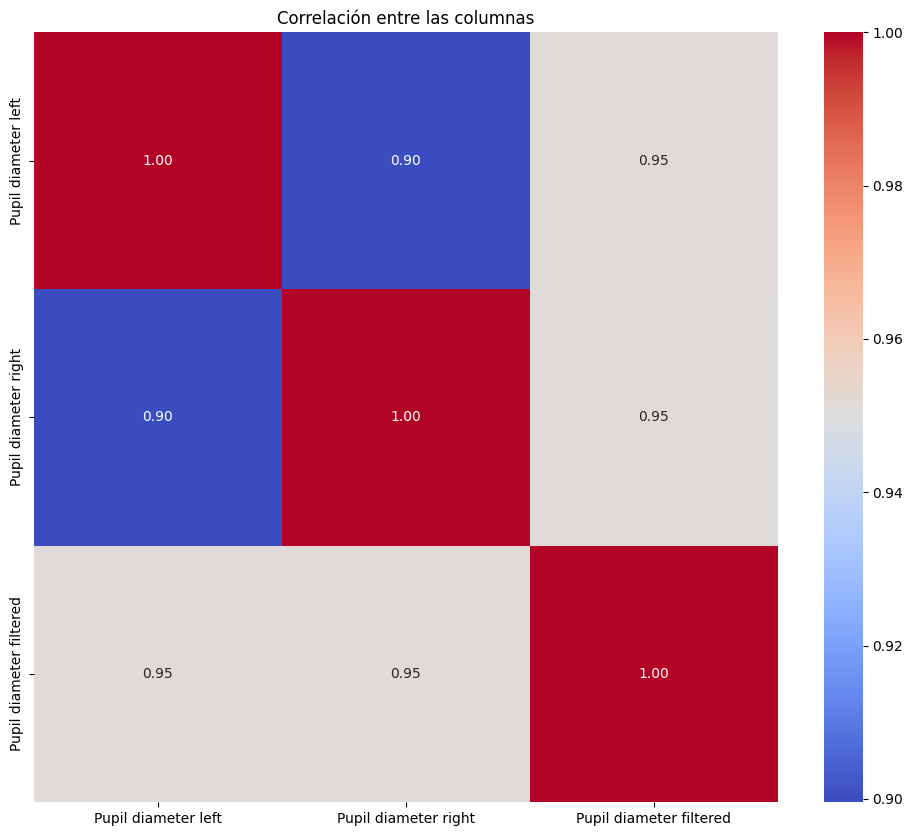

In [377]:
df_significativas = df_copy[relevant_columns2]
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df_significativas.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Genera el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Configura el título del gráfico
plt.title('Correlación entre las columnas')

# Muestra el gráfico
plt.show()

In [378]:
threshold = 0.8 # umbral de corelacion

# Convertir la Serie correlation_results en un DataFrame
correlation_results_df = correlation_results_Pupil_diameter_left.to_frame()

# Filtrar las columnas con correlaciones significativas
relevant_columns3 = correlation_results_df[(correlation_results_df > threshold) | (correlation_results_df < -threshold)].dropna(axis=0, how='all').index

# Imprimir las columnas relevantes
print(relevant_columns3)

Index(['Pupil diameter left', 'Pupil diameter right',
       'Pupil diameter filtered'],
      dtype='object')


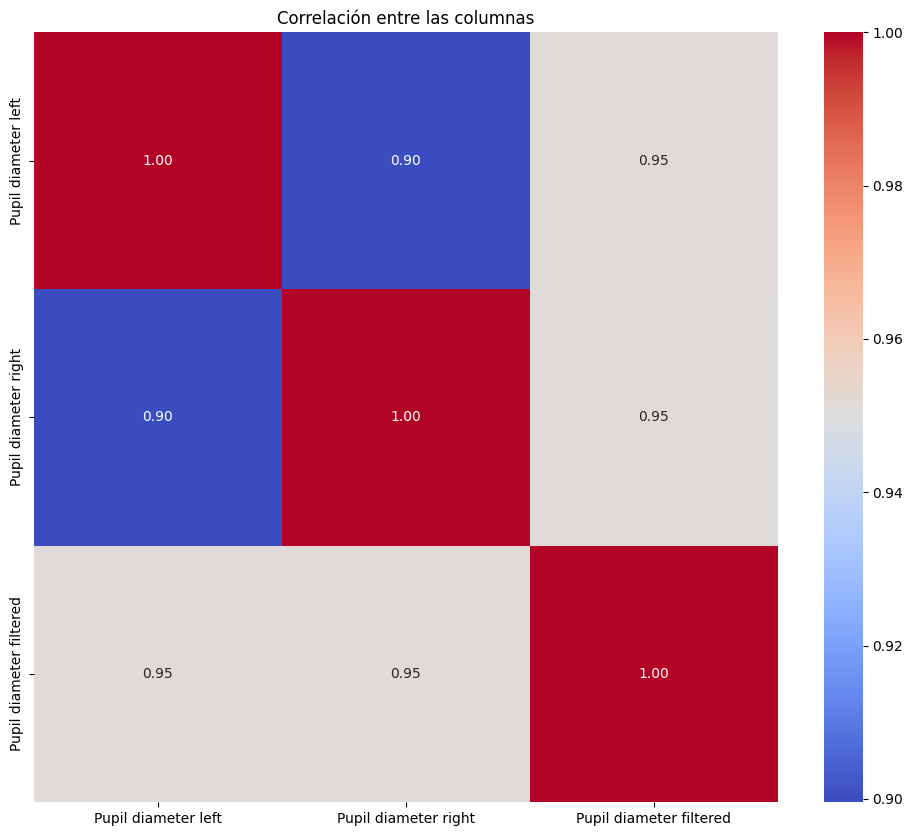

In [379]:
df_significativas = df_copy[relevant_columns3]
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df_significativas.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Genera el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Configura el título del gráfico
plt.title('Correlación entre las columnas')

# Muestra el gráfico
plt.show()

In [380]:
threshold = 0.8 # umbral de corelacion

# Convertir la Serie correlation_results en un DataFrame
correlation_results_df = correlation_results_Pupil_diameter_filtered.to_frame()

# Filtrar las columnas con correlaciones significativas
relevant_columns4 = correlation_results_df[(correlation_results_df > threshold) | (correlation_results_df < -threshold)].dropna(axis=0, how='all').index

# Imprimir las columnas relevantes
print(relevant_columns4)

Index(['Pupil diameter left', 'Pupil diameter right',
       'Pupil diameter filtered'],
      dtype='object')


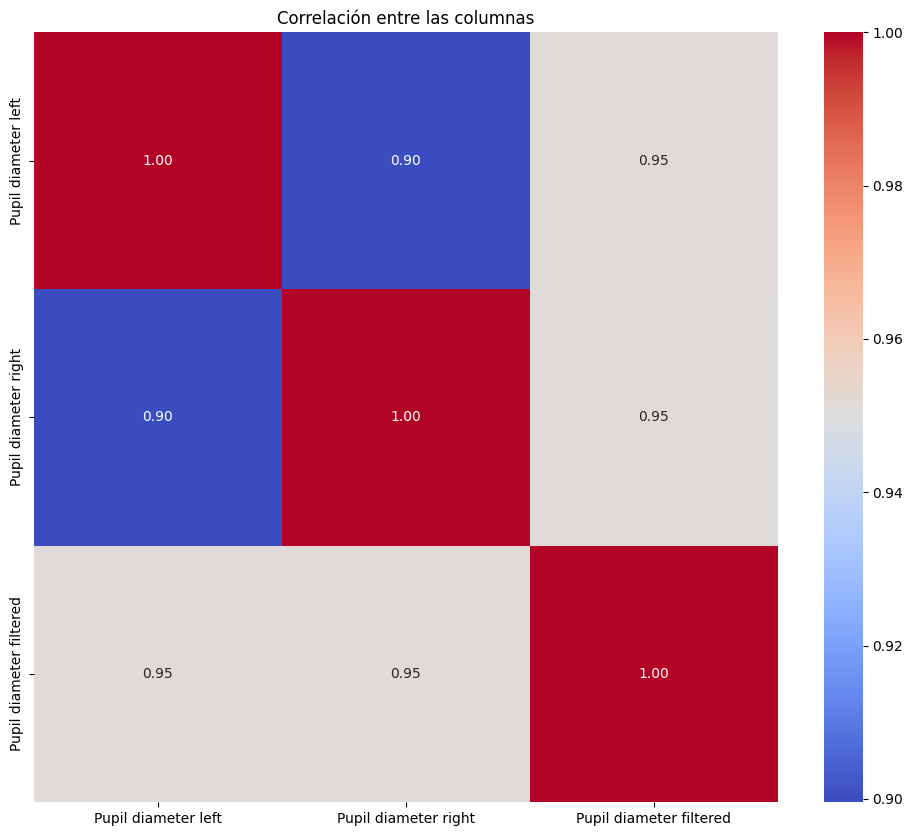

In [381]:
df_significativas = df_copy[relevant_columns4]
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df_significativas.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Genera el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Configura el título del gráfico
plt.title('Correlación entre las columnas')

# Muestra el gráfico
plt.show()

### Vizualiamos estas mismas columnas a largo del tiempo de computadora

In [382]:
# Renombrar la columna 'Computer timestamp' a 'Tiempo'
df_copy.rename(columns={'Computer timestamp': 'Tiempo'}, inplace=True)

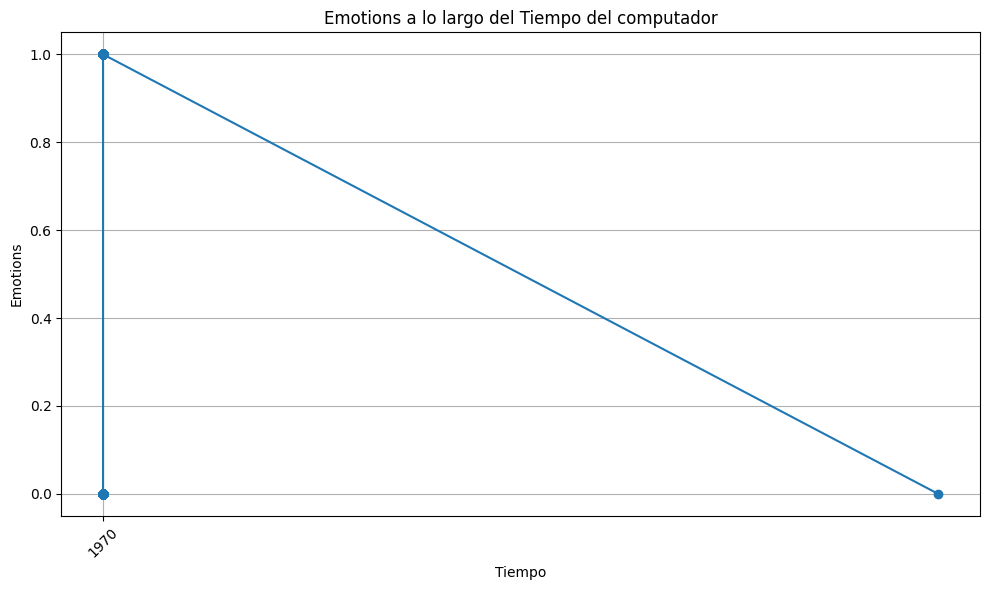

In [383]:
import pandas as pd
import matplotlib.pyplot as plt



# Convertir 'Tiempo' a datetime si es necesario
df_copy['Tiempo'] = pd.to_datetime(df_copy['Tiempo'])

# Ordenar el DataFrame por 'Tiempo'
df_copy = df_copy.sort_values(by='Tiempo')

# Graficar la dilatación pupilar a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_copy['Tiempo'], df_copy['Emotions'], marker='o', linestyle='-')
plt.title('Emotions a lo largo del Tiempo del computador')
plt.xlabel('Tiempo')
plt.ylabel('Emotions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

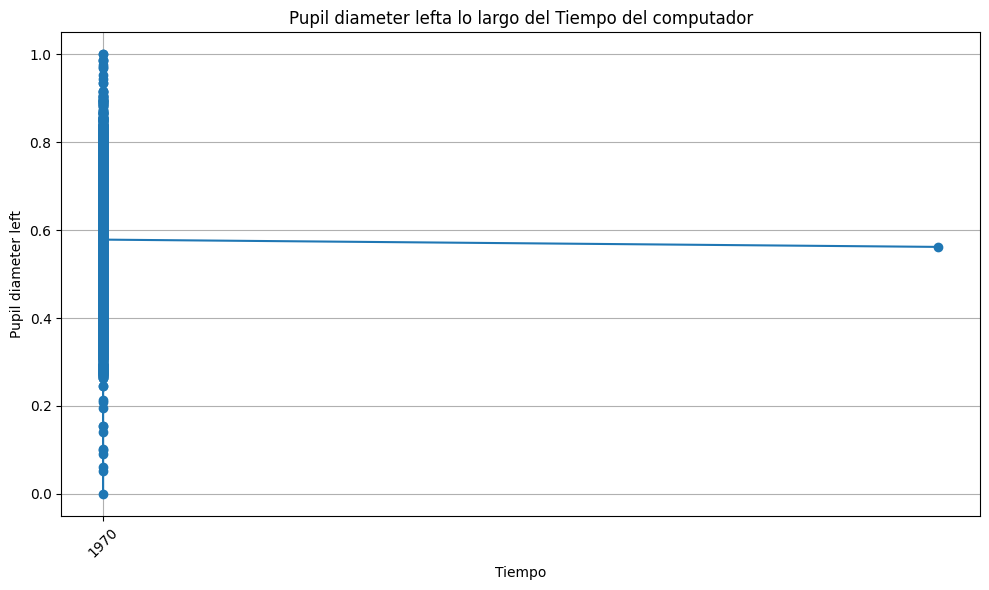

In [384]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir 'Tiempo' a datetime si es necesario
df_copy['Tiempo'] = pd.to_datetime(df_copy['Tiempo'])

# Ordenar el DataFrame por 'Tiempo'
df_copy = df_copy.sort_values(by='Tiempo')

# Graficar la dilatación pupilar a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_copy['Tiempo'], df_copy['Pupil diameter left'], marker='o', linestyle='-')
plt.title('Pupil diameter lefta lo largo del Tiempo del computador')
plt.xlabel('Tiempo')
plt.ylabel('Pupil diameter left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

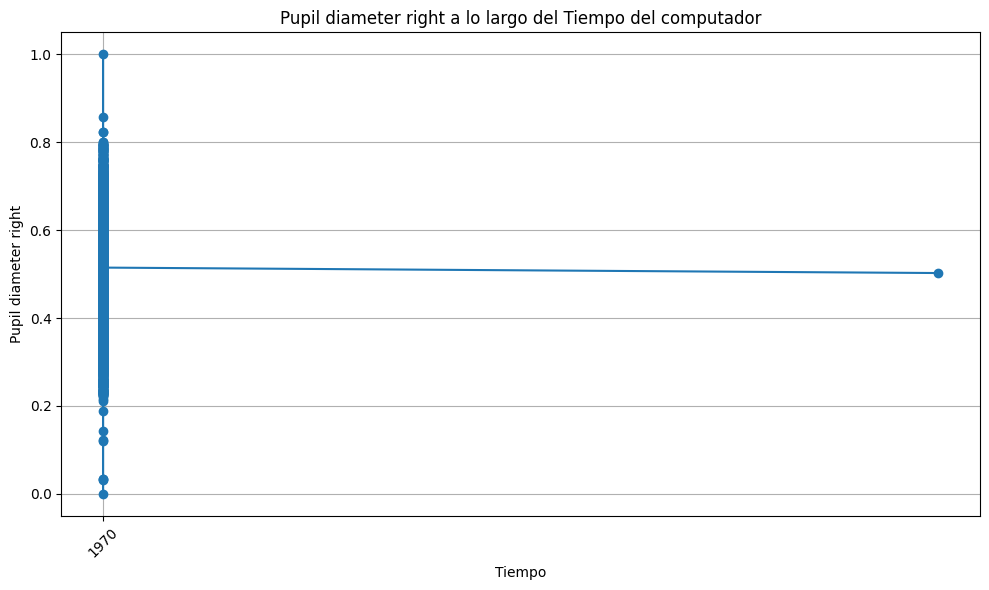

In [385]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir 'Tiempo' a datetime si es necesario
df_copy['Tiempo'] = pd.to_datetime(df_copy['Tiempo'])

# Ordenar el DataFrame por 'Tiempo'
df_copy = df_copy.sort_values(by='Tiempo')

# Graficar la dilatación pupilar a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_copy['Tiempo'], df_copy['Pupil diameter right'], marker='o', linestyle='-')
plt.title('Pupil diameter right a lo largo del Tiempo del computador')
plt.xlabel('Tiempo')
plt.ylabel('Pupil diameter right')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

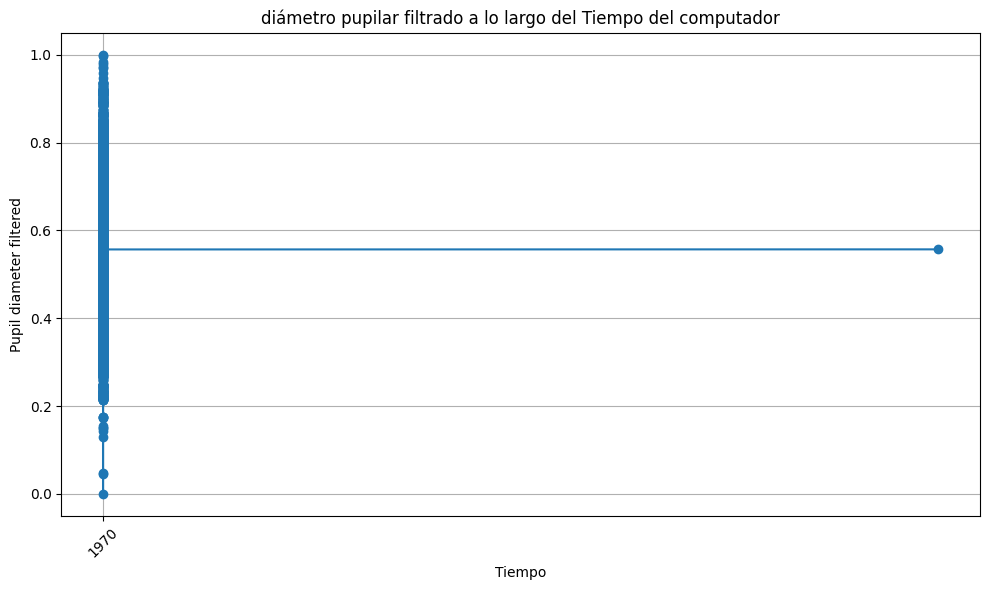

In [386]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir 'Tiempo' a datetime si es necesario
df_copy['Tiempo'] = pd.to_datetime(df_copy['Tiempo'])

# Ordenar el DataFrame por 'Tiempo'
df_copy = df_copy.sort_values(by='Tiempo')

# Graficar la dilatación pupilar a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_copy['Tiempo'], df_copy['Pupil diameter filtered'], marker='o', linestyle='-')
plt.title('diámetro pupilar filtrado a lo largo del Tiempo del computador')
plt.xlabel('Tiempo')
plt.ylabel('Pupil diameter filtered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Determinamos el numero de cluster en base a 

In [395]:
df_copy = pd.read_excel('Participante_1/datos_normalizados.xlsx')

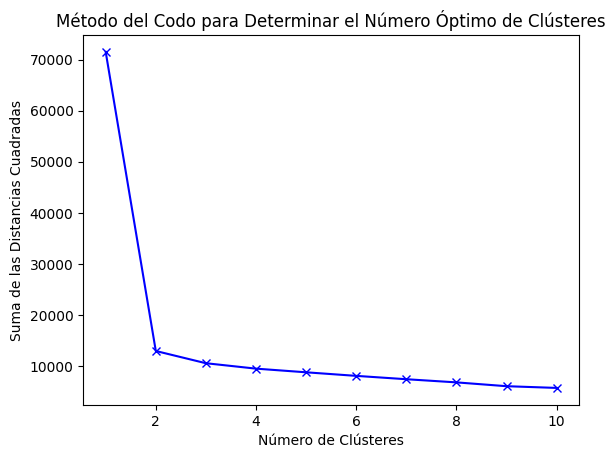

In [389]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar las sumas de las distancias cuadradas intra-clúster
sum_of_squared_distances = []

# Número de clústeres que queremos probar
num_clusters = range(1, 11)

# Iterar sobre el rango de números de clústeres
for k in num_clusters:
    # Inicializar el modelo de KMeans con k clústeres
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(df_copy)  
    sum_of_squared_distances.append(kmeans.inertia_)  # Guardar la suma de las distancias cuadradas

# Graficar el método del codo
plt.plot(num_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de las Distancias Cuadradas')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.show()

### clusterin de datos

In [396]:
from sklearn.cluster import KMeans

# Definir el número de clústeres
n_clusters = 2

# Inicializar el modelo k-medias con n_init explícito
kmeans = KMeans(n_clusters=n_clusters, n_init=10)

# Ajustar el modelo a los datos
kmeans.fit(df_copy)

# Obtener las etiquetas de los clústeres asignados a cada instancia
labels = kmeans.labels_

# Obtener las coordenadas de los centroides de los clústeres
centroids = kmeans.cluster_centers_

### Suma de los cuadrados de las distancias dentro del grupo

In [403]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Calcula los índices de los centroides más cercanos para cada punto de datos
closest_centroids, _ = pairwise_distances_argmin_min(df_copy, centroids)

# Calcula las distancias al cuadrado entre cada punto y su centroide más cercano
distances_squared = np.sum((df_copy - centroids[closest_centroids]) ** 2, axis=1)

# Suma las distancias al cuadrado dentro de cada grupo para obtener WCSS
wcss = np.sum(distances_squared)

print("WCSS (Suma de los cuadrados de las distancias dentro del grupo):", wcss)

WCSS (Suma de los cuadrados de las distancias dentro del grupo): 12941.001554418766


### Vizualizacion del cluster y el centroide


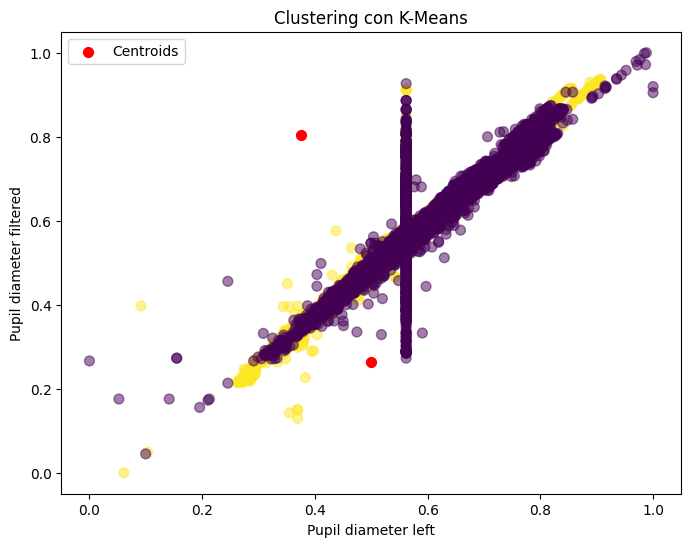

In [408]:
import matplotlib.pyplot as plt

# Visualiza los puntos en función de su asignación a los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['Pupil diameter left'], df_copy['Pupil diameter filtered'], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='.', label='Centroids')
plt.title('Clustering con K-Means')
plt.xlabel('Pupil diameter left')
plt.ylabel('Pupil diameter filtered')
plt.legend()
plt.show()



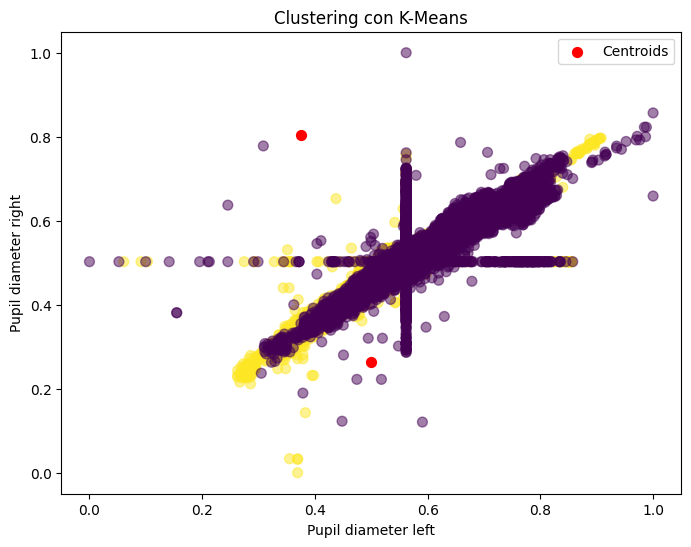

In [409]:
import matplotlib.pyplot as plt

# Visualiza los puntos en función de su asignación a los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['Pupil diameter left'], df_copy['Pupil diameter right'], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='.', label='Centroids')
plt.title('Clustering con K-Means')
plt.xlabel('Pupil diameter left')
plt.ylabel('Pupil diameter right')
plt.legend()
plt.show()



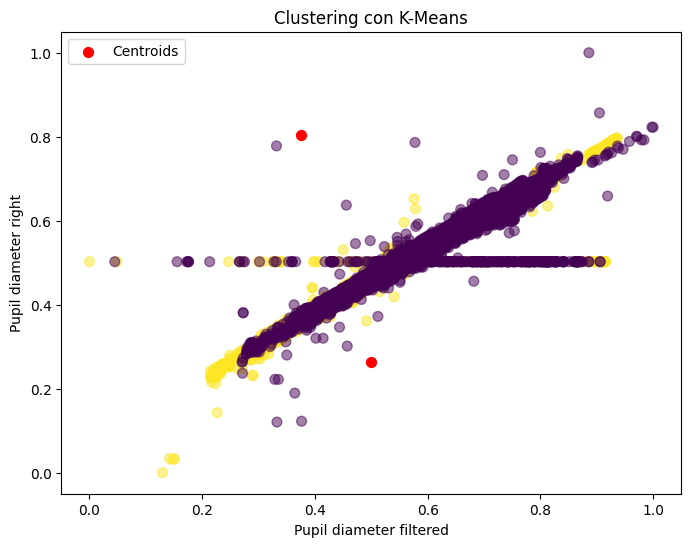

In [410]:
import matplotlib.pyplot as plt

# Visualiza los puntos en función de su asignación a los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['Pupil diameter filtered'], df_copy['Pupil diameter right'], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='.', label='Centroids')
plt.title('Clustering con K-Means')
plt.xlabel('Pupil diameter filtered')
plt.ylabel('Pupil diameter right')
plt.legend()
plt.show()



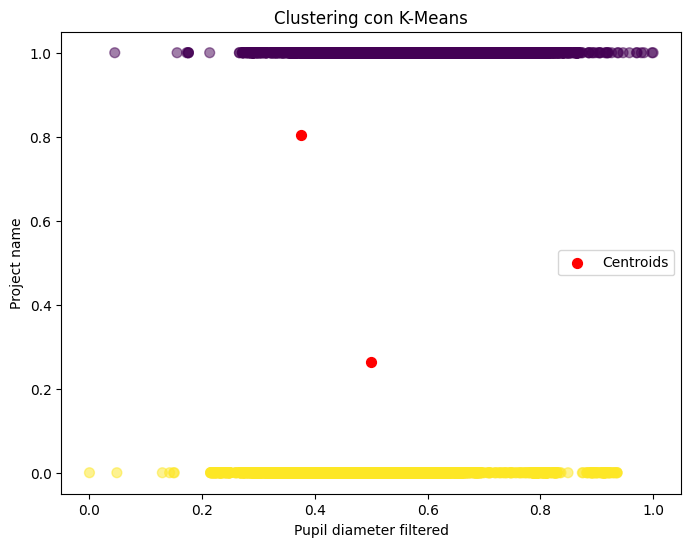

In [414]:
import matplotlib.pyplot as plt

# Visualiza los puntos en función de su asignación a los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['Pupil diameter filtered'], df_copy['Project name'], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='.', label='Centroids')
plt.title('Clustering con K-Means')
plt.xlabel('Pupil diameter filtered')
plt.ylabel('Project name')
plt.legend()
plt.show()

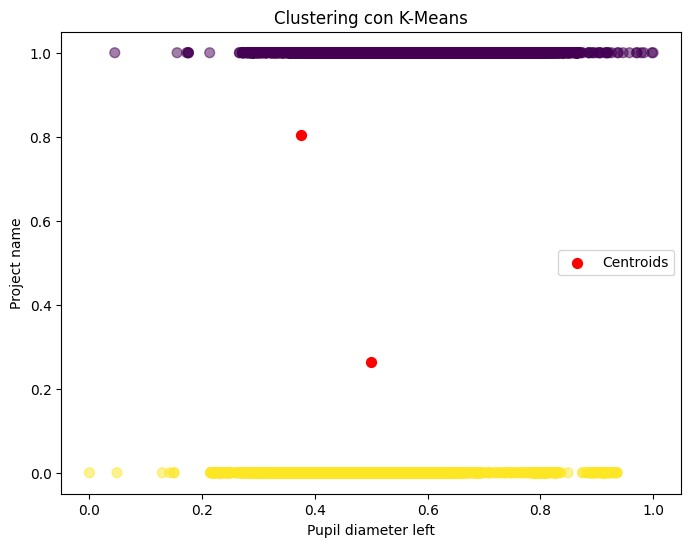

In [413]:
import matplotlib.pyplot as plt

# Visualiza los puntos en función de su asignación a los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['Pupil diameter filtered'], df_copy['Project name'], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='.', label='Centroids')
plt.title('Clustering con K-Means')
plt.xlabel('Pupil diameter left')
plt.ylabel('Project name')
plt.legend()
plt.show()

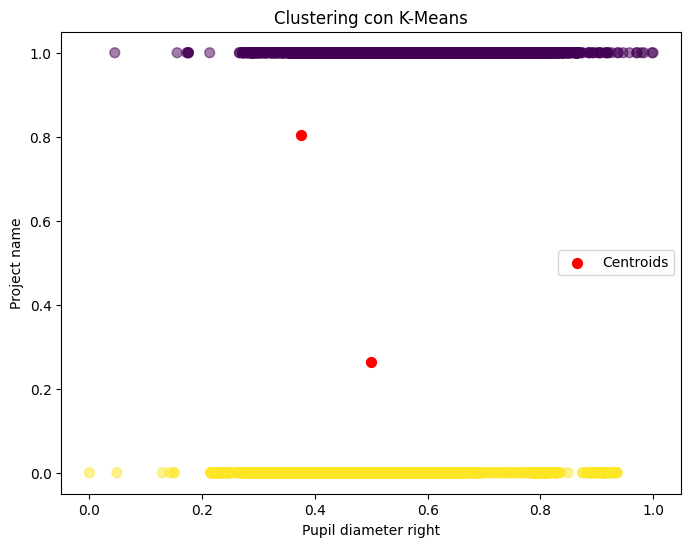

In [412]:
import matplotlib.pyplot as plt

# Visualiza los puntos en función de su asignación a los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['Pupil diameter filtered'], df_copy['Project name'], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='.', label='Centroids')
plt.title('Clustering con K-Means')
plt.xlabel('Pupil diameter right')
plt.ylabel('Project name')
plt.legend()
plt.show()